In [1]:
import pandas as pd
home_credit = pd.read_csv('application_train.csv')
home_credit.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,2.0,1,1,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1.0,2,2,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1.0,2,2,0,0,0,0,1,1,Religion


In [2]:
#Are there any missing data?
print(home_credit.isnull().sum())

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

#### Finding columns who have more than 40% missing data and dropping them from the dataset

In [3]:
def find_missing(data):
    missing_count = data.isnull().sum().values
    total = len(data)
    ratio_missing = missing_count/total*100
    return pd.DataFrame(data={'column name':data.columns.values, 'missing_ratio':ratio_missing})

In [4]:
#There aren't any columns with more than 40% missing data
find_missing(home_credit).sort_values(['missing_ratio'], ascending=False).head(30)

,column name,missing_ratio
27,OCCUPATION_TYPE,31.345545
11,NAME_TYPE_SUITE,0.420148
10,AMT_GOODS_PRICE,0.090403
9,AMT_ANNUITY,0.003902
28,CNT_FAM_MEMBERS,0.000650
23,FLAG_WORK_PHONE,0.000000
24,FLAG_CONT_MOBILE,0.000000
25,FLAG_PHONE,0.000000
26,FLAG_EMAIL,0.000000
29,REGION_RATING_CLIENT,0.000000


In [ ]:
#If there are columns with more than 40% missing data, then run these codes
#missingcolumns_40=find_missing(home_credit)
#missingcolumn_40_list=list(missingcolumns_40['column name'][missingcolumns_40.missing_ratio>40])
#len(missingcolumn_40_list)
#home_credit.drop(missingcolumns_40_list,axis=1,inplace=True)

0    282686
1     24825
Name: TARGET, dtype: int64


<AxesSubplot:>

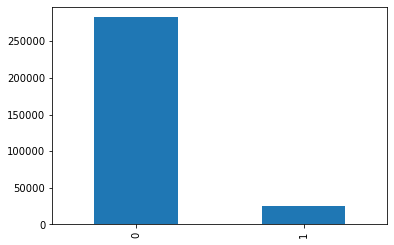

In [5]:
#Draw bar chart to see default distribution
import matplotlib.pyplot as plt
%matplotlib inline
print(home_credit.TARGET.value_counts())
home_credit.TARGET.value_counts().plot(kind='bar')

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


<AxesSubplot:>

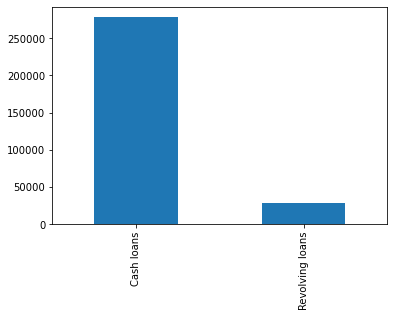

In [6]:
#Draw a bar chart to see contract type distribution 
print(home_credit.NAME_CONTRACT_TYPE.value_counts())
home_credit.NAME_CONTRACT_TYPE.value_counts().plot(kind='bar')

In [7]:
pd.crosstab(home_credit['TARGET'], home_credit['NAME_CONTRACT_TYPE'])

NAME_CONTRACT_TYPE,Cash loans,Revolving loans
TARGET,,
0,255011,27675
1,23221,1604


In [8]:
print(pd.crosstab(home_credit['CODE_GENDER'], home_credit['NAME_CONTRACT_TYPE'], margins=True))

NAME_CONTRACT_TYPE  Cash loans  Revolving loans     All
CODE_GENDER                                            
F                       182800            19648  202448
M                        95432             9627  105059
XNA                          0                4       4
All                     278232            29279  307511


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


<AxesSubplot:>

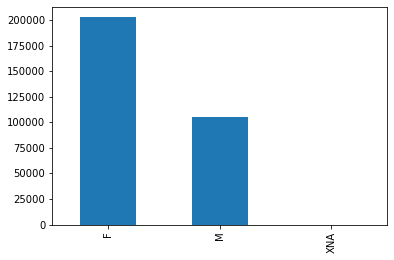

In [9]:
print(home_credit.CODE_GENDER.value_counts())
home_credit.CODE_GENDER.value_counts().plot(kind='bar')

###### Removing the 4 rows who have gender as XNA in them for the purpose of consistency

In [10]:
home_credit = home_credit[home_credit.CODE_GENDER!='XNA']

F    202448
M    105059
Name: CODE_GENDER, dtype: int64


<AxesSubplot:>

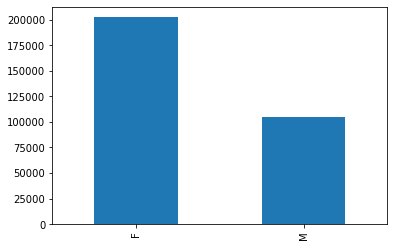

In [11]:
print(home_credit.CODE_GENDER.value_counts())
home_credit.CODE_GENDER.value_counts().plot(kind='bar')

###### There are 202448 female customers and 105059 male customers

In [12]:
print(pd.crosstab(home_credit['CODE_GENDER'], home_credit['TARGET'], margins=True))

TARGET            0      1     All
CODE_GENDER                       
F            188278  14170  202448
M             94404  10655  105059
All          282682  24825  307507


###### The cases of default recorded in female customers higher than that recorded in male customers. It is not a strage thing since the amount of female customers is twice as high as the amount of male customers 

### Use One-Hot Encoding

In [13]:
#one-hot encoding of categorical variables using get dummies
home_credit = pd.get_dummies(home_credit)
home_credit

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0,0,0,0,0,0,1
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0,0,0,0,0,0


###### Now we find correlations of each variables with our TARGET variable to understand which variables affect the most in a positive or negative way

In [14]:
#Find correlations with the target 
correlations = home_credit.corr()['TARGET'].sort_values()
correlations.head()

NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054710
NAME_INCOME_TYPE_Pensioner             -0.046211
ORGANIZATION_TYPE_XNA                  -0.045989
DAYS_EMPLOYED                          -0.044934
Name: TARGET, dtype: float64

In [15]:
#Display correlations
print('10 Most Positive Correlations:\n', correlations.tail(10))
print('\n10 Most Negative Correlations:\n', correlations.head(10))

10 Most Positive Correlations:
 FLAG_EMP_PHONE                                       0.045984
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049822
REG_CITY_NOT_WORK_CITY                               0.050992
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054710
NAME_INCOME_TYPE_Working                             0.057483
REGION_RATING_CLIENT                                 0.058901
REGION_RATING_CLIENT_W_CITY                          0.060895
DAYS_BIRTH                                           0.078242
TARGET                                               1.000000
Name: TARGET, dtype: float64

10 Most Negative Correlations:
 NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054710
NAME_INCOME_TYPE_Pensioner             -0.046211
ORGANIZATION_TYPE_XNA                  -0.045989
DAYS_EMPLOYED                          -0.044934
AMT_GOODS_PRICE                        -0

###### The target value correlated with the days_birth in the first positive correlation. However, since the days_birth is a negative value, it means it is negatively correlated, which means that the smaller your age is, the more likely you're going to default

In [16]:
import seaborn as sns

In [17]:
#Calcute customer's age in days at the time of application
print(home_credit.loc[home_credit['TARGET'] == 0, 'DAYS_BIRTH'] / 365*-1)

1         45.931507
2         52.180822
3         52.068493
4         54.608219
5         46.413699
            ...    
307505    66.805479
307506    25.553425
307507    56.917808
307508    41.002740
307510    46.180822
Name: DAYS_BIRTH, Length: 282682, dtype: float64


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


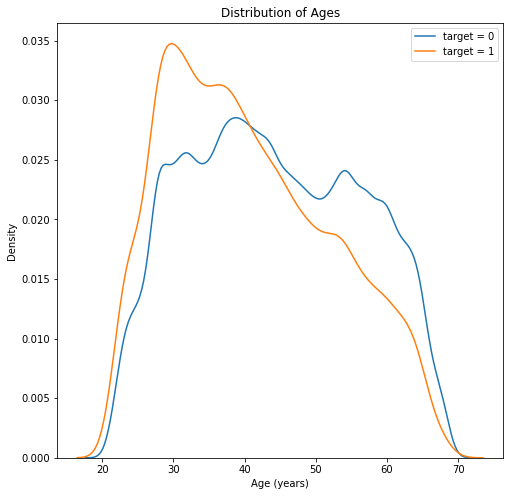

In [18]:
plt.figure(figsize = (8, 8))

#Distribution plot of loans that were repaid on time
sns.distplot(home_credit.loc[home_credit['TARGET'] == 0, 'DAYS_BIRTH']/365*-1, hist=False, label = 'target = 0')

#Distribution plot of loans that were not repaid on time
sns.distplot(home_credit.loc[home_credit['TARGET'] == 1, 'DAYS_BIRTH']/365*-1, hist=False, label = 'target = 1')

#Labeling of plot
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.legend()

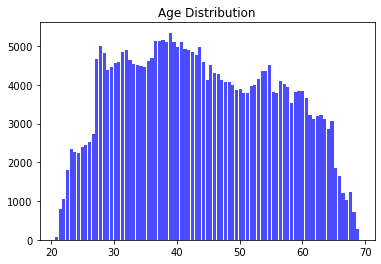

In [19]:
n, bins, patches = plt.hist(x=home_credit['DAYS_BIRTH']/365*-1,
                            bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.title("Age Distribution")
plt.show()

###### Plotting a similar plot for NAME_EDUCATION_TYPE_Higher education

In [20]:
print(pd.crosstab(home_credit['NAME_EDUCATION_TYPE_Higher education'],
                  home_credit['TARGET'], margins=True))

TARGET                                     0      1     All
NAME_EDUCATION_TYPE_Higher education                       
0                                     211829  20816  232645
1                                      70853   4009   74862
All                                   282682  24825  307507


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


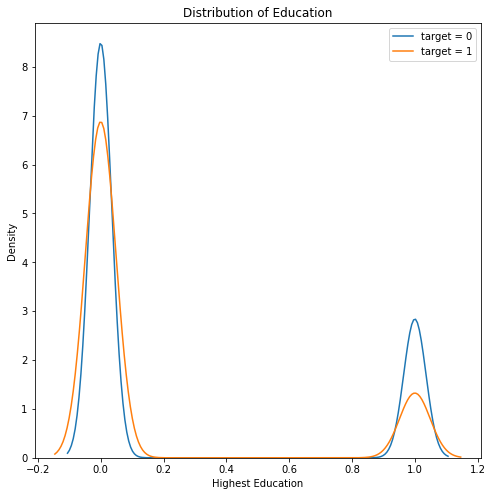

In [21]:
plt.figure(figsize = (8, 8))

#Distribution plot of loans that were repaid on time
sns.distplot(home_credit.loc[home_credit['TARGET'] == 0, 'NAME_EDUCATION_TYPE_Higher education'], hist=False, label = 'target = 0')

#Distribution plot of loans that were not repaid on time
sns.distplot(home_credit.loc[home_credit['TARGET'] == 1, 'NAME_EDUCATION_TYPE_Higher education'], hist=False, label = 'target = 1')

#Labeling of plot
plt.xlabel('Highest Education')
plt.ylabel('Density')
plt.title('Distribution of Education')
plt.legend()

###### After applying one-hot encoding, 1 stands for Higher Education, and 0 stands for other types of education (including Academic Degree, Incomplete higher, Lower Secondary, Secondary/secondary special). The above chart doesn't tell us much information about the relationship between customer's highest education and the likely to default

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


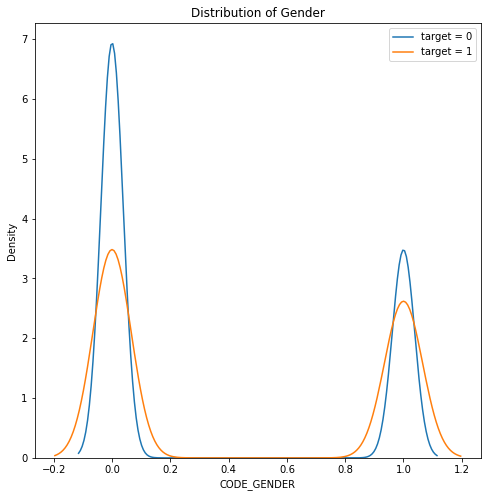

In [22]:
plt.figure(figsize = (8, 8))

#Distribution plot of loans that were repaid on time
sns.distplot(home_credit.loc[home_credit['TARGET'] == 0, 'CODE_GENDER_M'], hist=False, label = 'target = 0')

#Distribution plot of loans that were not repaid on time
sns.distplot(home_credit.loc[home_credit['TARGET'] == 1, 'CODE_GENDER_M'], hist=False, label = 'target = 1')

#Labeling of plot
plt.xlabel('CODE_GENDER')
plt.ylabel('Density')
plt.title('Distribution of Gender')
plt.legend()

###### After using one-hot encoding, 1 stands for male and 0 stands for female. This chart tells us that: if you are female, you are more likely to repay the loan on time. However, I don't consider this is a believable result, since the amount of female customers is twice as high as the amount of male customers

### Population Level Predictions

In [23]:
home_credit_onehot = home_credit

In [24]:
#impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(home_credit)
data_complete = imputer.transform(home_credit)
print(data_complete.shape)

(307507, 143)


In [29]:
data_complete = pd.DataFrame(data_complete, columns = home_credit_onehot.columns)
data_complete

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456251.0,0.0,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327.0,-236.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307503,456252.0,0.0,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775.0,365243.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307504,456253.0,0.0,0.0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966.0,-7921.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307505,456254.0,1.0,0.0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961.0,-4786.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
data_target_0 = data_complete[data_complete["TARGET"] == 0]
data_target_0

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
1,100003.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008.0,0.0,0.0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941.0,-1588.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307501,456249.0,0.0,0.0,112500.0,225000.0,22050.0,225000.0,0.022800,-24384.0,365243.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307502,456251.0,0.0,0.0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327.0,-236.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307503,456252.0,0.0,0.0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775.0,365243.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307504,456253.0,0.0,0.0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966.0,-7921.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
data_target_1 = data_complete[data_complete["TARGET"]==1]
data_target_1

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,100031.0,1.0,0.0,112500.0,979992.0,27076.5,702000.0,0.018029,-18724.0,-2628.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,100047.0,1.0,0.0,202500.0,1193580.0,35028.0,855000.0,0.025164,-17482.0,-1262.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,100049.0,1.0,0.0,135000.0,288873.0,16258.5,238500.0,0.007305,-13384.0,-3597.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,100096.0,1.0,0.0,81000.0,252000.0,14593.5,252000.0,0.028663,-24794.0,365243.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307444,456186.0,1.0,1.0,207000.0,450000.0,32746.5,450000.0,0.020246,-9918.0,-3048.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307471,456215.0,1.0,1.0,144000.0,1303200.0,46809.0,1125000.0,0.007330,-13416.0,-2405.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307477,456225.0,1.0,0.0,225000.0,297000.0,19975.5,297000.0,0.008575,-20644.0,-3147.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307485,456233.0,1.0,0.0,225000.0,521280.0,23089.5,450000.0,0.014464,-16471.0,-286.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Imbalaced data 
There's a great difference in the amount of target 0 (282,686 cases) and target 1 (24,825 cases). A classification data set with skewed class proportions is called imbalanced. Classes that make up a large proportion of the data set are called majority classes (target 0). Those that make up a smaller proportion are minority classes (target 1). In order to run a correct machine learning model, the proportion of these two classes must be the same. 

In this project, I will use this method:

####  Just take 25,000 first rows of target 0, target 1 stays the same

In [33]:
modified_data = pd.concat([data_target_0[:25000], data_target_1])
from sklearn.utils import shuffle
modified_data = shuffle(modified_data)
data_complete1 = modified_data
data_complete1

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
6996,108147.0,1.0,1.0,157500.0,202500.0,9567.0,202500.0,0.018209,-16384.0,-1338.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209610,342938.0,1.0,0.0,157500.0,922500.0,29889.0,922500.0,0.014464,-19869.0,-413.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13129,115297.0,0.0,0.0,157500.0,265869.0,19345.5,225000.0,0.018209,-17128.0,-837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24022,127936.0,0.0,1.0,171000.0,206271.0,24480.0,193500.0,0.009657,-10903.0,-2110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257539,398028.0,1.0,0.0,135000.0,337500.0,17230.5,337500.0,0.014520,-16975.0,-1031.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7708,108988.0,0.0,1.0,225000.0,474048.0,24948.0,360000.0,0.002134,-13760.0,-3939.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208777,341982.0,1.0,0.0,67500.0,562491.0,24907.5,454500.0,0.031329,-22155.0,365243.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21286,124800.0,0.0,0.0,135000.0,1453257.0,42619.5,1269000.0,0.007020,-12665.0,-5813.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6974,108124.0,0.0,1.0,360000.0,363190.5,20979.0,328500.0,0.025164,-15546.0,-5205.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Split the dataset
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(data_complete1.drop(['TARGET'], axis=1), data_complete1['TARGET'], test_size=0.3, random_state=42)

### Logistic Regression Model 

Now, we run a basic logistic regression by just using the normalized data as a baseline model

In [35]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(train_X, train_y)
#Predicting the model
pred_logit = logit.predict(test_X)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,
roc_auc_score,plot_confusion_matrix, plot_precision_recall_curve


In [37]:
print('The accuracy of logit model is:', accuracy_score(test_y, pred_logit))
print(classification_report(test_y, pred_logit))

The accuracy of logit model is: 0.8686780840246187
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87      7547
         1.0       0.88      0.85      0.86      7401

    accuracy                           0.87     14948
   macro avg       0.87      0.87      0.87     14948
weighted avg       0.87      0.87      0.87     14948



- Precision: Out of all people that the model predicted would be defaulted, 88% actually did.
- Recall: Out of all people that actually were defaulted, the model predicted this outcome correctly for 85% of those players.
- Since F1-score is 0.86, close to 1, it tells us that the model does a good job of predicting whether or not people would be defaulted.
- Among the people in the test dataset, 7547 people were not defaulted and 7401 people were defaulted.

### Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
#Fitting the model
rf.fit(train_X, train_y)
#Predicting the model
pred_rf = rf.predict(test_X)

In [39]:
#Evaluating the Random Forest model

print('The accuracy of random forest model is:',
accuracy_score(test_y, pred_rf))
print(classification_report(test_y, pred_rf))

The accuracy of random forest model is: 0.9547096601552048
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      7547
         1.0       1.00      0.91      0.95      7401

    accuracy                           0.95     14948
   macro avg       0.96      0.95      0.95     14948
weighted avg       0.96      0.95      0.95     14948



### Extreme Gradient Boosting (XGBoost)

In [41]:
pip install xgboost

In [42]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
#fitting the model
xgb_clf.fit(train_X, train_y)
#predicting the model
xgb_predict = xgb_clf.predict(test_X)

In [43]:
#Evaluating the xgboost model
print("The accuracy of xgboost model is:",
     accuracy_score(test_y, xgb_predict))
print(classification_report(test_y, xgb_predict))

The accuracy of xgboost model is: 0.9535054856837035
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      7547
         1.0       1.00      0.91      0.95      7401

    accuracy                           0.95     14948
   macro avg       0.96      0.95      0.95     14948
weighted avg       0.96      0.95      0.95     14948

